# Test you components individually here

In [1]:
from backend.data_handler import DataHandler
dh = DataHandler("../csv")

Reading Files: 100%|██████████| 6/6 [00:00<00:00, 199.14it/s]


In [2]:
import sys
from matplotlib import pyplot as plt
import seaborn as sns
sys.path.append('../')
import src.backend.data_handler as bbm

In [3]:
# folder_path = ../error_files
folder_path = "../csv"
data_handler = bbm.DataHandler(folder_path)
# merged_df_ecl, merged_df_ecf = bbm.read_csv_from_folder(folder_path)
summary_ecl = data_handler.ecl_freq_summary
# file_path = input("Input  file path: ")
# df_ecl, df_ecf = read_csv_from_file(file_path)
# sumary_ecl = get_ecl_summary(df_ecl)
# print(sumary_ecl)
summary_ecl

Reading Files: 100%|██████████| 6/6 [00:00<00:00, 164.12it/s]


,Description,Frequency
0,AXLE1_LOCK GONE,11
1,AXLE2_LOCK GONE,10
2,AXLE3_LOCK GONE,11
3,AXLE4_LOCK GONE,11
4,E_SS_SC_OC2 GONE,11
5,E_DV1_TOUT GONE,4
6,E_DV2_TOUT GONE,2
7,E_DV3_TOUT GONE,2
8,E_DV4_TOUT GONE,4
9,E_SENS_FR1 GONE,2


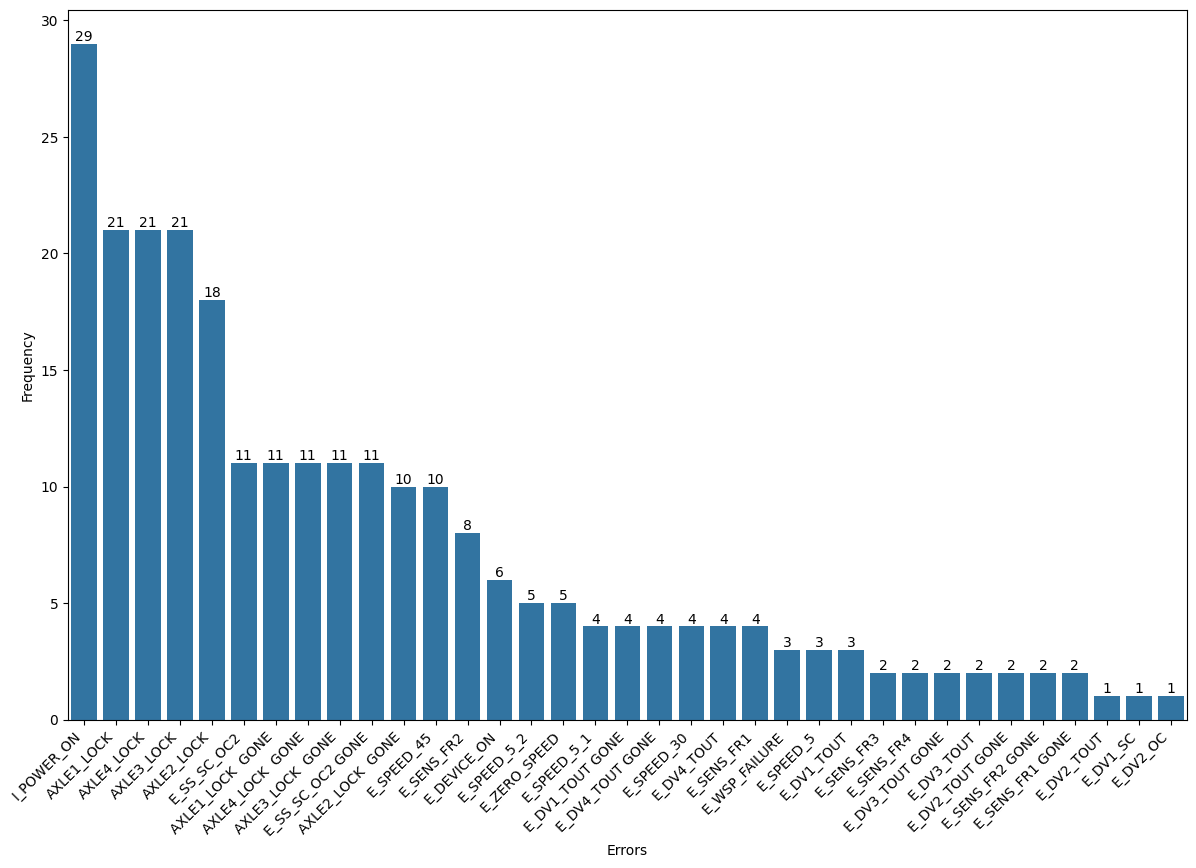

In [4]:
summary_ecl = summary_ecl.sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(12, 8))
plt.xlabel("Errors")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

ax = sns.barplot(x=summary_ecl["Description"], y=summary_ecl["Frequency"])

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom')  # Centered horizontally, slightly above the bar

plt.show()

In [5]:
summary_ecl = summary_ecl.sort_values(by="Frequency", ascending=False)

# plt.xticks(rotation=45, ha='right')



# ax = .barplot(x=summary_ecl["Description"], y=summary_ecl["Frequency"])

# for p in ax.patches:
#     ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
#                 ha='center', va='bottom')  # Centered horizontally, slightly above the bar

plt.show()

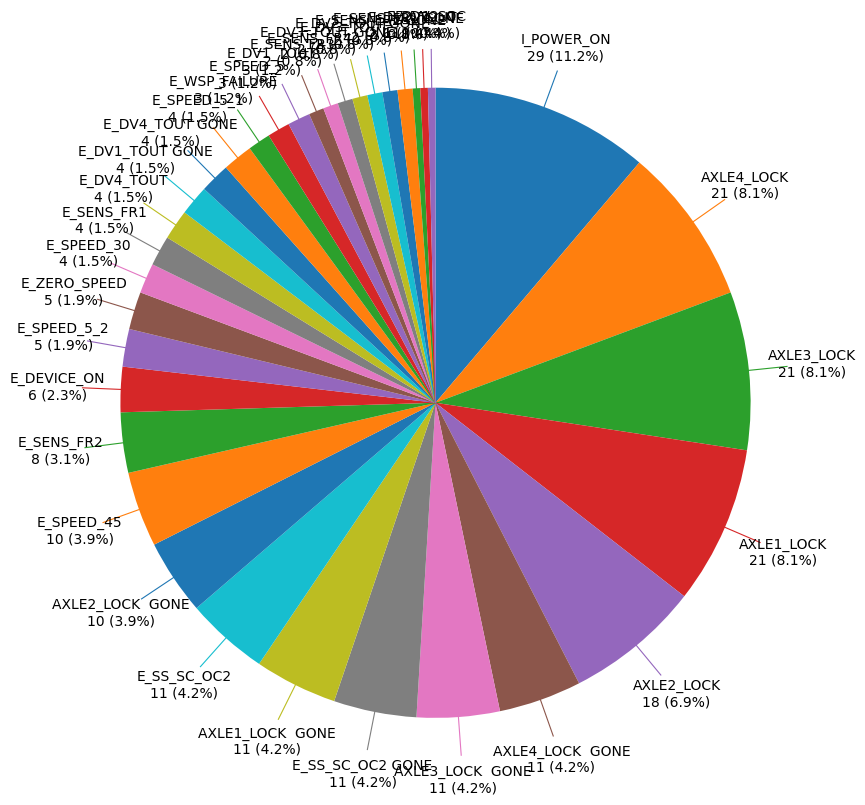

In [6]:
import math

# import matplotlib.pyplot as plt
def plot_pie_chart(labels, data, figsize=(10, 10)):
# Sample data
    # labels = ['Category A', 'Category B', 'Category C', 'Category D']
    # data = [350, 150, 300, 200]  # Actual data

    # Calculate percentages
    total = sum(data)
    percentages = [f"{size/total*100:.1f}%" for size in data]

    # Combine labels with data and percentages
    labels_with_data = [f"{label}\n{size} ({percentage})" for label, size, percentage in zip(labels, data, percentages)]

    # Plotting a flat pie chart
    plt.figure(figsize=figsize)
    plt.pie(data, labels=None, startangle=90, counterclock=False) # Labels with indicating lines are manually added 
    # plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.

    for i, (dataPoint, label) in enumerate(zip(data, labels_with_data)):
        angle = 90 - (sum(data[:i]) + dataPoint / 2) / total * 360  # Calculate the angle
        x = 1.2 * math.cos(angle * math.pi / 180)
        y = 1.2 * math.sin(angle * math.pi / 180)
        plt.text(x, y, label, ha='center', va='center', fontsize=10)
        plt.plot([0, x/1.07], [0, y/1.07], linestyle='solid', linewidth=0.8)  # Line from center to text

    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.

    plt.show()

plot_pie_chart(summary_ecl["Description"], summary_ecl["Frequency"])

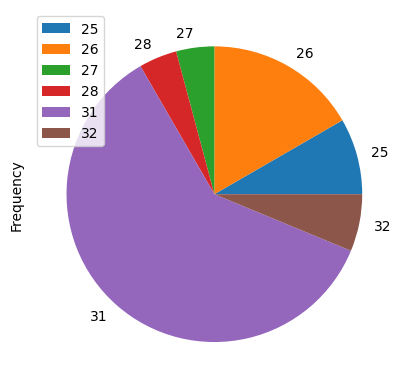

In [24]:
def plot_pie_chart(labels, data, figsize=(10, 10)):
        fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(aspect="equal"))

        wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"),
                bbox=bbox_props, zorder=0, va="center")

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = math.sin(ang*math.pi/180)
            x = math.cos(ang*math.pi/180)
            horizontalalignment = {-1: "right", 1: "left"}[int(math.copysign(1, x))]
            connectionstyle = f"angle,angleA=0,angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(labels[i], xy=(x, y), xytext=(1.35*math.copysign(1, x), 1.4*y),
                        horizontalalignment=horizontalalignment, **kw)

        plt.show()
tags = ['E_SPEED_5', 'I_POWER_ON', 'E_SENS_FR4', 'E_SENS_FR3', 'E_SENS_FR2', 'E_SENS_FR1']
filtered_df = dh.ecl_freq_summary[dh.ecl_freq_summary["Description"].isin(tags)]
# display(filtered_df)
# plot_pie_chart(filtered_df["Description"].tolist(), filtered_df["Frequency"].tolist(), (10, 10))
filtered_df.plot(kind='pie', x='Description', y='Frequency')
plt.show()